# Statistical Learning Week 6: PCA and NMF

### Jonathan Gragg: East Section

In [44]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import warnings
warnings.filterwarnings(action='ignore')

## 1. Download and fetch the data with the following Python code:
* Each row of X is an image that has been flattened, and y contains an ID for each person. Select an image from this dataset and display it. (5 pts)
* Hint: this is the same dataset we used in the Week 1 Live Session. 

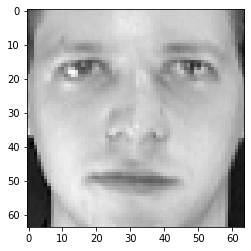

In [45]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

plt.imshow(X[0, :].reshape(64, 64), cmap=plt.cm.gray)

## 2. Setup training and testing sets. Use a 60/40 split for each class (6 training images and 4 test images per person), and set the seed or random_state so that you can repeat the same randomization later. Print the size of the training and testing feature (image) matrices. (5 pts)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, stratify=y, random_state=1)

print("Training Data Set:",X_train.shape)
print("Testing Data Set:",X_test.shape)

Training Data Set: (240, 4096)
Testing Data Set: (160, 4096)


## 3. Standardize the training data so that each column has mean 0 and standard deviation 1. Apply the transformation to the test data. Print an image. (5 pts)

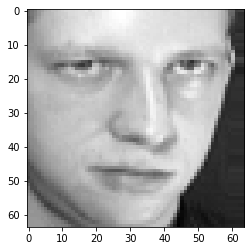

In [47]:
X_train = minmax_scale(X_train, feature_range=(0,1), axis=1)

plt.imshow(X_train[0, :].reshape(64, 64), cmap=plt.cm.gray)

## 4. Compute PCA on the training set using 100 components. Plot the first 3 principal component loadings as images. (10 pts)

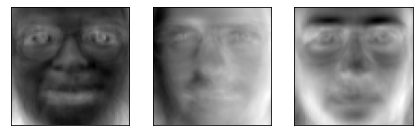

In [48]:
pca = PCA(n_components=100).fit(X_train)

loadings = minmax_scale(pca.components_, feature_range=(0,1), axis=1)

plt.figure(figsize=(25,20))
for j in range(3):
    plt.subplot(5,10,j+1)
    plt.imshow(loadings[j, :].reshape(64, 64), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())



## 5. Create a scree plot of the principal components (explained variance vs. number of components). (10 pts)

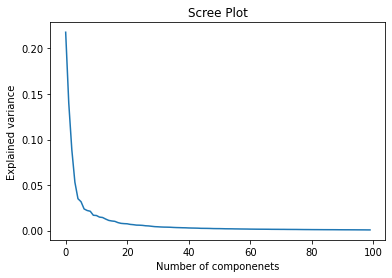

In [49]:
plt.plot(pca.explained_variance_ratio_)
plt.title("Scree Plot")
plt.xlabel('Number of componenets')
plt.ylabel('Explained variance')
plt.show()

## 6. Use PCA to transform your training and test sets to their principal components. Train an LDA model on these principal components. Make predictions on both the training and test set. Report the accuracy on both the training and test sets. (10 pts)

In [50]:
from sklearn.metrics import accuracy_score

PC_train = pca.transform(X_train)
PC_test = pca.transform(X_test)

lda = LDA().fit(PC_train, y_train)

train_preds_pc = lda.predict(PC_train)

print("Train Accuracy: {:.0f}%".format(100*accuracy_score(y_train,train_preds_pc)))

test_preds_pc = lda.predict(PC_test)

print("Test Accuracy: {:.0f}%".format(100*accuracy_score(y_test,test_preds_pc)))

Train Accuracy: 100%
Test Accuracy: 93%


## 7. Next, we will use Non-negative Matrix Factorization to reduce the dimensions. First, we need the data to be non-negative. Create your training and testing sets again (using the same seed or random_state from Question 2), but this time don't standardize it (they're already non-negative). (5 pts)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, stratify=y, random_state=1)

## 8. Compute the NMF on the training set using 100 components. Plot the first 3 components as images. (10 pts)

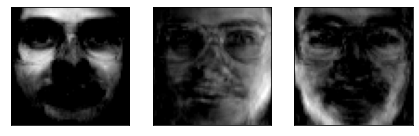

In [52]:
nmf = NMF(n_components=100,init='nndsvdar').fit(X_train)

loadings = minmax_scale(nmf.components_, feature_range=(0,1), axis=1)

plt.figure(figsize=(25,20))
for j in range(3):
    plt.subplot(5,10,j+1)
    plt.imshow(loadings[j, :].reshape(64, 64), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

## 9. Use NMF to transform your training and test sets. Train an LDA model on the transformed features. Make predictions on both the training and test set. Report the accuracy on both the training and test sets. (10 pts)

In [53]:
NM_train = nmf.transform(X_train)
NM_test = nmf.transform(X_test)

lda = LDA().fit(NM_train, y_train)

train_preds_nm = lda.predict(NM_train)

print("Train Accuracy: {:.0f}%".format(100*accuracy_score(y_train,train_preds_nm)))

test_preds_nm = lda.predict(NM_test)

print("Test Accuracy: {:.0f}%".format(100*accuracy_score(y_test,test_preds_nm)))

Train Accuracy: 100%
Test Accuracy: 96%


## 10. Write a few sentences to compare the features derived from PCA and NMF, and to compare the performance of the models using PCA vs. NMF. (5 pts)

It appears that the NMF model perfomed better on the test set. The NMF looks similar to an inverse of the PCA image. NMF looks to be showing more exagerated variance than the PCA Model. PCA was focused on large shapes while NMF is focusing on high variance areas within the face.

## 11. Pick an example of an image from the test set that was misclassified by the PCA model and print their picture. (5 pts)

In [54]:
check = pd.DataFrame({"y_test":y_test,'preds':test_preds_pc})

check.loc[~(check['y_test'] == check['preds'])]

,y_test,preds
6,13,2
17,19,20
22,13,2
35,38,0
70,38,0
94,7,2
99,21,0
107,26,0
122,31,22
131,19,20


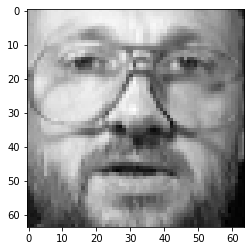

In [55]:
plt.imshow(X_test[22, :].reshape(64, 64), cmap=plt.cm.gray)

## 12. For the image you selected in Q11, did the model using NMF misclassify this image as well? (5 pts)

In [56]:
check = pd.DataFrame({"y_test":y_test,'preds':test_preds_nm})

check.loc[~(check['y_test'] == check['preds'])]

,y_test,preds
6,13,25
17,19,20
46,4,39
94,7,17
122,31,22
131,19,20
158,23,20


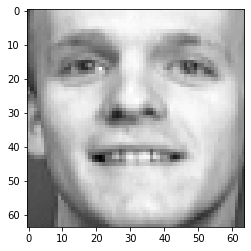

In [57]:
plt.imshow(X_test[46, :].reshape(64, 64), cmap=plt.cm.gray)

## 13. Who did the model think it was? (5 pts)
* What class (person) did the model using PCA predict for Question 11?
* Pick an image of that person and print it. 

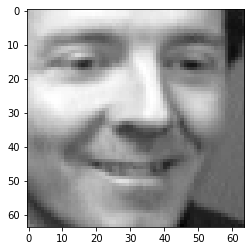

In [58]:
index = pd.DataFrame(np.where(y_test == 2))
plt.imshow(X_test[index[0], :].reshape(64, 64), cmap=plt.cm.gray)

## 14. Did the model make a sensible prediction? (5 pts)
* Do you think the person in Q13 looks similar to the correct one from Q11?

I actually do not think they look close.

* What probabilities did the model using PCA assign to the actual and predicted classes? 

In [67]:
probs = lda.predict_proba(PC_test).round(4)

probs[22]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

## 15. From an ethical perspective what concerns do you have about these PCA features being used in a new facial recognition software? Explain in a few sentences. (5 pts)

I have only seen white male faces in the few examples I've pulled out. My concern would be that any facial recognition models are going to biased to white males.